In [1]:
# Test 4-1 Dataset 4 v2
# This test uses a simple CNN to classify between having an circle or parcial circle
# This test uses the new dataset 16000 images

In [20]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import shutil
from tensorflow import keras
from keras import layers
from keras.utils import image_dataset_from_directory
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
train_dir = '../../Dataset_Scripts/Datasets/Dataset_4/train'
test_dir = '../../Dataset_Scripts/Datasets/Dataset_4/test'

In [4]:
IMG_SIZE = 500
BATCH_SIZE = 32
RANDOM_SEED = random.randint(0, 1000)
print(RANDOM_SEED)

602


In [5]:
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=True,
    )

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=True
    )

Found 10000 files belonging to 2 classes.


2024-04-16 20:33:18.839174: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-16 20:33:18.839358: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-16 20:33:18.839455: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 5000 files belonging to 2 classes.


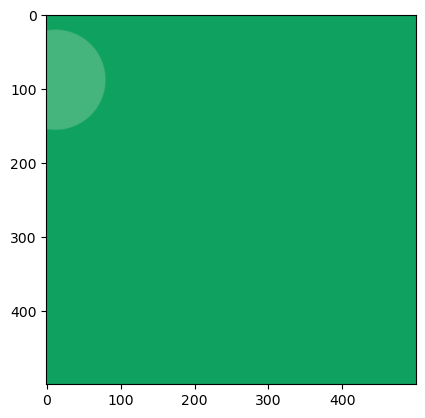

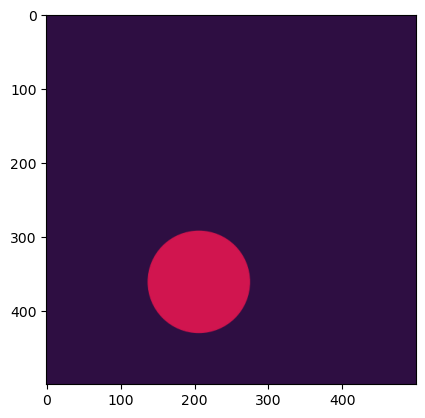

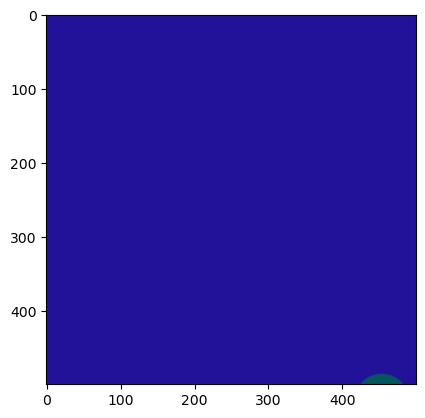

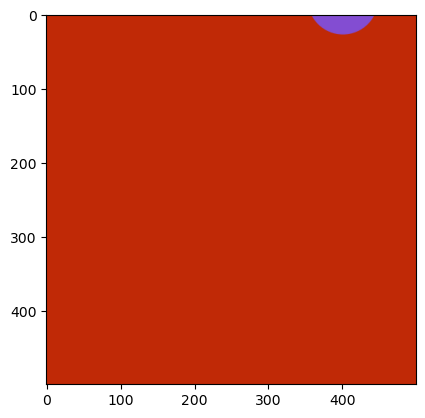

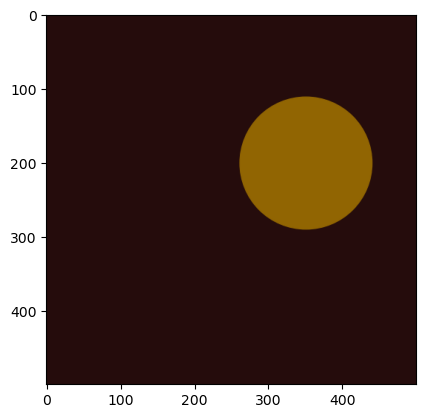

In [6]:
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [7]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500, 500, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 500, 500, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 498, 498, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 249, 249, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 123, 123, 64)      0         
 g2D)                                                        

In [9]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [10]:
checkpoint_filepath = 'models/4-1/ch-{epoch:03d}.ckpt'
callbacks = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)



In [11]:
# Best Epoch = ?
history = model.fit(train_dataset, epochs=15, batch_size=16, validation_data=test_dataset, callbacks=[callbacks,early_stop])

Epoch 1/15


2024-04-16 20:33:23.288826: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-04-16 20:33:23.379684: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-16 20:33:25.989073: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fc7a883dc70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-16 20:33:25.989096: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-04-16 20:33:25.993119: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1713296006.029043   11604 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-04-16 20:33:29.299158: W extern

  1/313 [..............................] - ETA: 1:03:21 - loss: 0.6923 - acc: 0.5312

2024-04-16 20:33:34.456811: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.36GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


313/313 [==============================] - ETA: 0s - loss: 0.6856 - acc: 0.5587
Epoch 1: val_loss improved from inf to 0.64341, saving model to models/4-1/ch-001.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-001.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-001.ckpt/assets


313/313 [==============================] - 97s 273ms/step - loss: 0.6856 - acc: 0.5587 - val_loss: 0.6434 - val_acc: 0.6406
Epoch 2/15
313/313 [==============================] - ETA: 0s - loss: 0.5264 - acc: 0.7500
Epoch 2: val_loss improved from 0.64341 to 0.42224, saving model to models/4-1/ch-002.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-002.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-002.ckpt/assets


313/313 [==============================] - 80s 256ms/step - loss: 0.5264 - acc: 0.7500 - val_loss: 0.4222 - val_acc: 0.8180
Epoch 3/15
313/313 [==============================] - ETA: 0s - loss: 0.3771 - acc: 0.8489
Epoch 3: val_loss improved from 0.42224 to 0.34234, saving model to models/4-1/ch-003.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-003.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-003.ckpt/assets


313/313 [==============================] - 79s 252ms/step - loss: 0.3771 - acc: 0.8489 - val_loss: 0.3423 - val_acc: 0.8738
Epoch 4/15
313/313 [==============================] - ETA: 0s - loss: 0.3111 - acc: 0.8757
Epoch 4: val_loss improved from 0.34234 to 0.29783, saving model to models/4-1/ch-004.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-004.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-004.ckpt/assets


313/313 [==============================] - 83s 265ms/step - loss: 0.3111 - acc: 0.8757 - val_loss: 0.2978 - val_acc: 0.8908
Epoch 5/15
313/313 [==============================] - ETA: 0s - loss: 0.2614 - acc: 0.8968
Epoch 5: val_loss improved from 0.29783 to 0.29637, saving model to models/4-1/ch-005.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-005.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-005.ckpt/assets


313/313 [==============================] - 85s 271ms/step - loss: 0.2614 - acc: 0.8968 - val_loss: 0.2964 - val_acc: 0.8748
Epoch 6/15
313/313 [==============================] - ETA: 0s - loss: 0.2205 - acc: 0.9169
Epoch 6: val_loss improved from 0.29637 to 0.25073, saving model to models/4-1/ch-006.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-006.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-006.ckpt/assets


313/313 [==============================] - 87s 279ms/step - loss: 0.2205 - acc: 0.9169 - val_loss: 0.2507 - val_acc: 0.9170
Epoch 7/15
313/313 [==============================] - ETA: 0s - loss: 0.1827 - acc: 0.9364
Epoch 7: val_loss improved from 0.25073 to 0.23367, saving model to models/4-1/ch-007.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-007.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-007.ckpt/assets


313/313 [==============================] - 86s 275ms/step - loss: 0.1827 - acc: 0.9364 - val_loss: 0.2337 - val_acc: 0.9132
Epoch 8/15
313/313 [==============================] - ETA: 0s - loss: 0.1463 - acc: 0.9513
Epoch 8: val_loss did not improve from 0.23367
313/313 [==============================] - 85s 271ms/step - loss: 0.1463 - acc: 0.9513 - val_loss: 0.2686 - val_acc: 0.9244
Epoch 9/15
313/313 [==============================] - ETA: 0s - loss: 0.1255 - acc: 0.9585
Epoch 9: val_loss improved from 0.23367 to 0.19977, saving model to models/4-1/ch-009.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-009.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-009.ckpt/assets


313/313 [==============================] - 87s 276ms/step - loss: 0.1255 - acc: 0.9585 - val_loss: 0.1998 - val_acc: 0.9364
Epoch 10/15
313/313 [==============================] - ETA: 0s - loss: 0.0998 - acc: 0.9668
Epoch 10: val_loss did not improve from 0.19977
313/313 [==============================] - 87s 277ms/step - loss: 0.0998 - acc: 0.9668 - val_loss: 0.2021 - val_acc: 0.9412
Epoch 11/15
313/313 [==============================] - ETA: 0s - loss: 0.0833 - acc: 0.9741
Epoch 11: val_loss did not improve from 0.19977
313/313 [==============================] - 88s 279ms/step - loss: 0.0833 - acc: 0.9741 - val_loss: 0.2034 - val_acc: 0.9422
Epoch 12/15
313/313 [==============================] - ETA: 0s - loss: 0.0750 - acc: 0.9776
Epoch 12: val_loss did not improve from 0.19977
313/313 [==============================] - 88s 282ms/step - loss: 0.0750 - acc: 0.9776 - val_loss: 0.2109 - val_acc: 0.9458
Epoch 13/15
313/313 [==============================] - ETA: 0s - loss: 0.0603 - acc:

In [12]:
val_loss, val_acc = model.evaluate(test_dataset, batch_size=64)
print(val_loss, val_acc)

157/157 [==============================] - 16s 104ms/step - loss: 0.2419 - acc: 0.9508
0.2419304996728897 0.9508000016212463


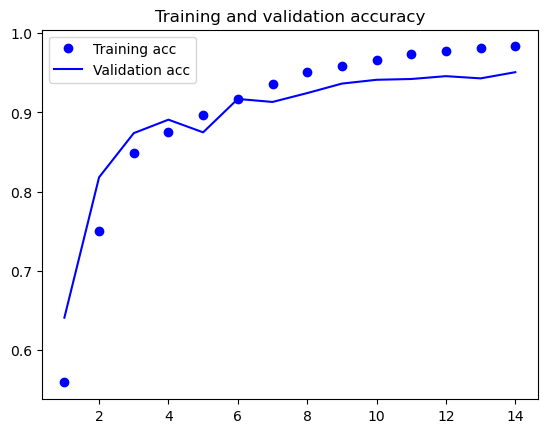

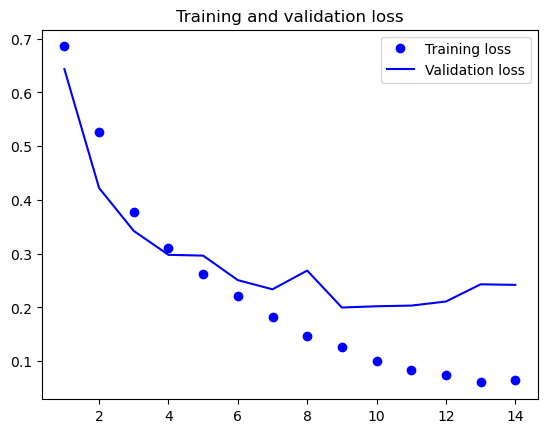

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("graphs/train_test_loss",dpi=100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("graphs/train_test_acc",dpi=100)
plt.show()

In [15]:
import csv
with open('results/4-1/results.csv', mode='w') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['Index', 'Label', 'Prediction'])
    for i, (data_batch, labels_batch) in enumerate(test_dataset):
        predictions = model.predict(data_batch)
        for j in range(len(predictions)):
            writer.writerow([i * BATCH_SIZE + j, labels_batch[j].numpy(), int(predictions[j][0].round())])

1/1 [==============================] - 0s 96ms/step


2024-04-16 20:58:53.150687: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 96000000 bytes after encountering the first element of size 96000000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


1/1 [==============================] - 0s 94ms/step


In [17]:
with open('results/1-1/results.csv', mode='r') as file:
    csvFile = csv.reader(file)
    for lines in csvFile:
        if lines[1] != lines[2]:
            print(lines)

['Index', 'Label', 'Prediction']
['235', '0', '1']
['610', '0', '1']
['800', '0', '1']
['1062', '0', '1']
['1291', '0', '1']
['1317', '0', '1']
['1843', '0', '1']
['2148', '0', '1']
['2697', '0', '1']
['2705', '0', '1']
['3236', '0', '1']
['3789', '0', '1']
['3809', '0', '1']
['4365', '0', '1']
['4395', '0', '1']
['4935', '0', '1']


In [26]:
file_paths = []
wrong_filenames = []
count = 0
file_idx = 0

# make sure we start in the beginning
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    shuffle=False
    )
    
file_paths = test_dataset.file_paths
for data_batch, labels_batch in test_dataset:

    predictions = model.predict(data_batch).flatten()
    predictions = predictions.round()
    predictions = predictions.astype(int)
    labels_batch = labels_batch.numpy()
    #pred_str = np.array2string(predictions, separator=', ')
    #label_str = np.array2string(labels_batch, separator=', ')
    for i in range(len(data_batch)):
        if labels_batch[i] != predictions[i]:
            wrong_filenames.append(file_paths[file_idx])
    file_idx += 1

# print(f"Predictions: {pred_str}")
# print(f"Labels: {label_str}")
print(file_idx)
print(count)
print(len(wrong_filenames))

Found 5000 files belonging to 2 classes.
1/1 [==============================] - 0s 17ms/step
5000
0
246


In [33]:
# write the wrong filenames to a file
with open('results/4-1/failed_filenames.txt', 'w') as f:
    for item in wrong_filenames:
        f.write("%s\n" % item)

In [21]:
output_folder = 'results/4-1/failed_images'
file_name = 'results/4-1/failed_filenames.txt'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

    # Read the lines from the input text file
    with open(file_name, 'r') as file:
        lines = file.readlines()

    # Copy images to the output folder
    for line in lines:
        # Remove trailing newline characters
        line = line.strip()
        # Check if the line is a valid image path
        if os.path.exists(line):
            # Extract the filename from the path
            filename = os.path.basename(line)
            # Copy the image to the output folder
            shutil.copy(line, os.path.join(output_folder, filename))
        else:
            print(f"Image path '{line}' does not exist.")

In [25]:
failed_images_dataset = image_dataset_from_directory(
    'results/4-1/failed_images',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

val_loss, val_acc = model.evaluate(failed_images_dataset, batch_size=32)
print(val_loss, val_acc)

Found 0 files belonging to 0 classes.


ValueError: No images found in directory results/4-1/failed_images. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [31]:
img = tf.keras.preprocessing.image.load_img('../../Dataset_Scripts/Datasets/Dataset_4/test/circles_cut/circle_cut_5003.png', target_size=(IMG_SIZE, IMG_SIZE))

In [32]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
print(img_array.shape)
result = model.predict(img_array)
print("Result: ", result.round())

(1, 500, 500, 3)
1/1 [==============================] - 0s 16ms/step
Result:  [[0.]]
